In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path='/Users/hurrywish/Downloads/Python_dataAnalysis_20201022_172952/【第01套 系统学习】Python数据分析师零基础入门到项目实战全套 201课 （课件、源码、项目、答案）/00.配套资料（课件、项目、答案、源码）/01.Python数据分析师课程资料/CLASSDATA_ch04进阶算法学习：统计分析能力强化/CH01数据特征分析/深圳罗湖二手房信息.csv'

In [5]:
data=pd.read_csv(path,encoding='gbk')

In [6]:
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


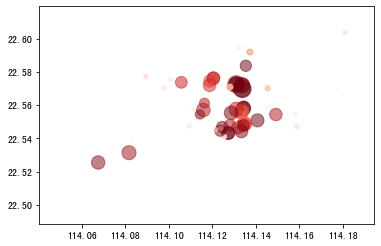

In [11]:
plt.scatter(data['经度'],data['纬度'],s=data['房屋单价']/300,c=data['参考总价'],alpha=0.5,cmap='Reds')

In [12]:
# 极差

def d_range(df,*cols):
    krange=list()
    for col in cols:
        crange=df[col].max()-df[col].min()
        krange.append(crange)
    return krange

key1='参考总价'
key2='参考首付'

dr=d_range(data,key1,key2)

In [13]:
print(dr)

[175.0, 52.5]


(array([0.03555556, 0.0431746 , 0.00253968, 0.00507937, 0.01015873,
        0.00507937, 0.00761905, 0.01015873, 0.02031746, 0.05079365]),
 array([ 7.5 , 12.75, 18.  , 23.25, 28.5 , 33.75, 39.  , 44.25, 49.5 ,
        54.75, 60.  ]),
 <a list of 10 Patch objects>)

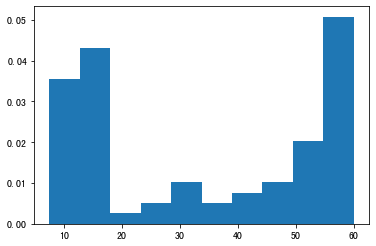

In [17]:
# 频率分布

plt.hist(data[key2],bins=10,density=True)

In [21]:
# 频率分布情况

gcut=pd.cut(data[key1],10,right=False)
gcut.value_counts(sort=False)

[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64

In [22]:
data['%s分组区间'%(key1)]=gcut.values

In [23]:
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


In [51]:
# 分组区间每个区间出现的频率
gcut_count=gcut.value_counts(sort=False)
r_zj=pd.DataFrame(gcut_count)
r_zj.rename({'参考总价':'频数'},axis=1,inplace=True)
r_zj['频率']=r_zj['频数']/r_zj['频数'].sum()
r_zj['累计频率']=r_zj['频率'].cumsum()
r_zj['频率%']=r_zj['频率'].apply(lambda x:'%.2f%%'%(x*100))
r_zj.style.bar(subset=['频率','累计频率'])

,频数,频率,累计频率,频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%
"[60.0, 77.5)",1,0.013333,0.426667,1.33%
"[77.5, 95.0)",2,0.026667,0.453333,2.67%
"[95.0, 112.5)",4,0.053333,0.506667,5.33%
"[112.5, 130.0)",2,0.026667,0.533333,2.67%
"[130.0, 147.5)",3,0.040000,0.573333,4.00%
"[147.5, 165.0)",4,0.053333,0.626667,5.33%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%
"[182.5, 200.175)",20,0.266667,1.000000,26.67%


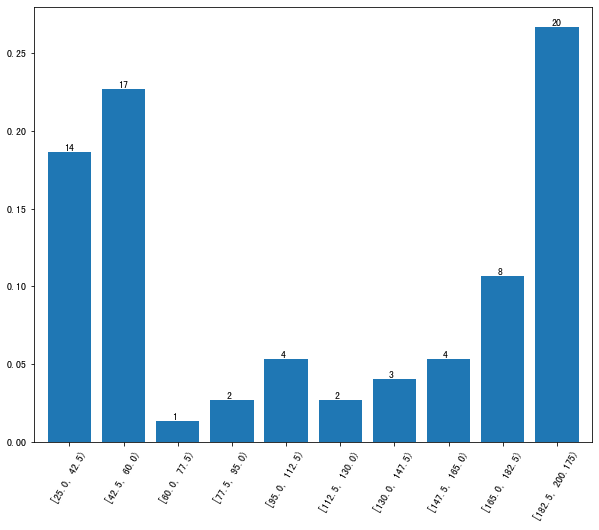

In [121]:
# 直方图
r_zj['频率'].plot.bar(rot=60,width=0.8,figsize=(10,8))

x=len(r_zj)
y=r_zj['频率']
z=r_zj['频数']
for i,j,k in zip(range(x),y,z):
    plt.text(i-0.1,j+0.001,'%s'%(k))

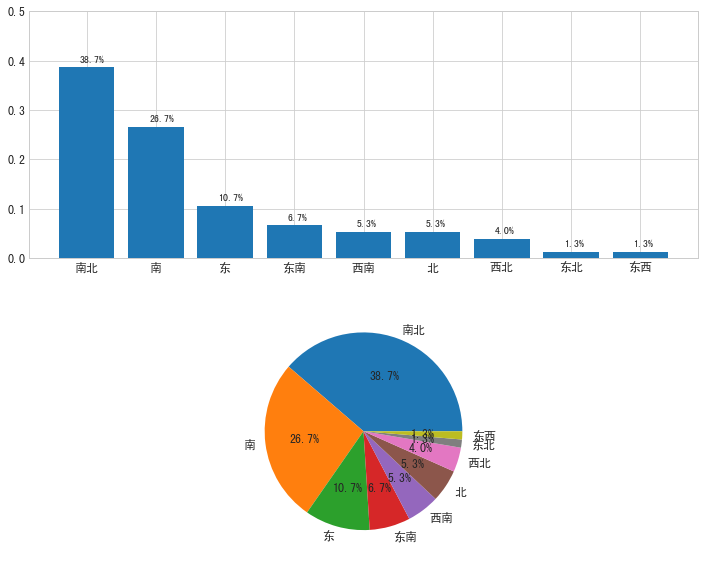

In [207]:
# 频率分布
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams.update({'font.size': 12})
cx_g=data['朝向']
cx_g_count=cx_g.value_counts()
array_cx=pd.DataFrame(cx_g_count)
array_cx.rename({'朝向':'频数'},axis=1,inplace=True)
array_cx['频率']=array_cx['频数']/array_cx['频数'].sum()
array_cx['累计频率']=array_cx['频率'].cumsum()
array_cx['频率%']=array_cx['频率'].apply(lambda x:'%.2f%%'%(x*100))
fig=plt.subplots(figsize=(12,10))
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2)
ax1.bar(x=array_cx.index,height=array_cx['频率'],width=0.8)
ax2.pie(array_cx['频率'],labels=array_cx['频率'].index,autopct='%.1f%%')
ax1.set_ylim([0,0.5])
for i,j,k in zip(range(len(array_cx)),array_cx['频率'],array_cx.index):
    ax1.text(i-0.1,j+0.01,'%.1f%%'%(j*100),fontsize=10)

In [151]:
array_cx

,频数,频率,累计频率,频率%
南北,29,0.386667,0.386667,38.67%
南,20,0.266667,0.653333,26.67%
东,8,0.106667,0.760000,10.67%
东南,5,0.066667,0.826667,6.67%
西南,4,0.053333,0.880000,5.33%
北,4,0.053333,0.933333,5.33%
西北,3,0.040000,0.973333,4.00%
东北,1,0.013333,0.986667,1.33%
东西,1,0.013333,1.000000,1.33%


In [200]:
plt.style.available 

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']